In [ ]:
# The first thing to do is to import libraries

import os
import zipfile
import random
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import string
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense




In [ ]:
# This code aims to import the file from /content/Monkey Pod Tree Dataset with the format of the file is excel
# The excel has been uploaded to this google colab workbook
file_path = "/content/Monkey Pod Tree Dataset.xlsx"

# This code aims to read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

In [ ]:
data = pd.read_excel('/content/Monkey Pod Tree Dataset.xlsx')

#This code aims to generate the output of the dataset from the head 20  rows
data.head(5)

,heights,circumstances,ages
0,8,28,20
1,9,25,23
2,6,30,20
3,6,26,23
4,5,29,23


In [ ]:
# This code aims to generate the output of the dataset from the tail 20  rows
data.tail(5)

,heights,circumstances,ages
174,35,105,60
175,31,108,62
176,36,108,65
177,33,103,62
178,36,110,64


In [ ]:
# This code aims to create a directory to store model checkpoints
os.makedirs("model_checkpoints", exist_ok=True)

def load_dataset(dataset_path):

    # This code aims to load the dataset
    dataset_path = '/content/Monkey Pod Tree Dataset.xlsx'
    df = pd.read_excel(dataset_path)

    # This code aims to validate and convert columns A (heights), B (circumferences), and C (ages) to integer type (requirements)
    df['heights'] = pd.to_numeric(df['heights'], errors='coerce').astype(float)
    df['circumstances'] = pd.to_numeric(df['circumstances'], errors='coerce').astype(float)
    df['ages'] = pd.to_numeric(df['ages'], errors='coerce').astype(float)

    # This code aims to drop any rows with missing or non-integer values (data cleaning process)
    df.dropna(inplace=True)

    # This code aims to extract the features (columns 'heights' and 'circumstances') and the target variable (column 'ages')
    features = df[['heights', 'circumstances']].values
    target = df['ages'].values

    return features, target

In [ ]:
def preprocess_data(features):
  
    # This code aims to perform data normalization using StandardScaler
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # This code aims to calculate the ratio of heights and corcumstances
    ratio = features[:, 0] / features[:, 1]

    return ratio

In [ ]:
def plot_distribution(ratio):
    # This code aims to plot the distribution of the dataset using graph
    plt.figure(figsize=(8, 6))
    plt.hist(ratio, bins=20, edgecolor='black')
    plt.xlabel('Ratio of Heights and Circumferences')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ratio')
    plt.show()

In [ ]:
def categorize_ratio(ratio):
  
    # This code aims to categorize the ratio into three categories that represent conditions of the ratio
    categories = np.zeros_like(ratio)
    categories[ratio < 10] = 0  # Category 0 for ratio < 10 "This tree has an EXCELLENT ratio"
    categories[(ratio >= 10) & (ratio <= 20)] = 1  # Category 1 for 10 <= ratio <= 20 "This tree has an IDEAL ratio"
    categories[ratio > 20] = 2  # Category 2 for ratio > 20 "This tree has BAD ratio"

    # This code aims to convert categories to one-hot encoding
    one_hot_categories = tf.keras.utils.to_categorical(categories, num_classes=3)

    return one_hot_categories

In [ ]:
def build_model():
    # This code aims to develop the neural network model architecture will be defined
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(2,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='sigmoid')) 
    return model

In [ ]:
def train_model(model, x_train, y_train, x_val, y_val, epochs):
    # This code aims to compile the model by defining the loss, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # This code aims to define a checkpoint callback to save the model weights after each epoch
    checkpoint_path = "model_checkpoints/model_{epoch:02d}.ckpt"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)

    # This code aims to train the model
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=32,
                                                callbacks=[checkpoint_callback])
    return history

In [ ]:
def make_decisions(predictions, ratio):
    # This code aims to make decisions based on predicted ages value and ratio of heights and circumferences
    decisions = []
    predicted_categories = np.argmax(predictions, axis=1)
    
    for i in range(len(predicted_categories)):
        predicted_ages = predicted_categories[i]
        current_ratio = ratio[i]
        
        if predicted_ages > 50:
            if categories == 0:
                decision = "NO"
            else:
                decision = "YES"
        else:
            if categories == 0 or categories == 1:
                decision = "NO"
            else:
                decision = "YES"
    
    return decisions

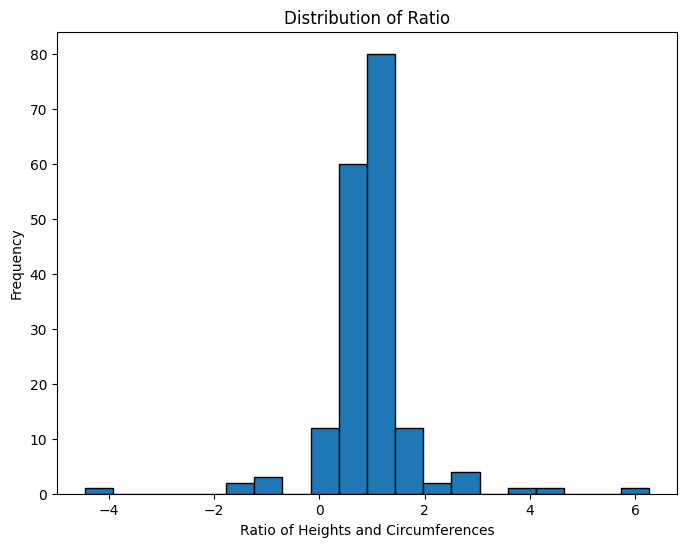

Epoch 1/50
5/5 [==============================] - 3s 63ms/step - loss: 0.5662 - accuracy: 0.7762 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 7.1372e-04 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 2.9806e-04 - accuracy: 1.0000 - val_loss: 2.3686e-04 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 1.1415e-04 - accuracy: 1.0000 - val_loss: 1.2200e-04 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 6.7057e-05 - accuracy: 1.0000 - val_loss: 8.0428e-05 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 5.1522e-05 - accuracy: 1.0000 - val_loss: 6.1660e-05 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 3.8031e-05 - accuracy: 1.0000 - val_loss: 5.2063e-05 - val_

NameError: ignored

In [ ]:
# Load the dataset
dataset_path = '/content/Monkey Pod Tree Dataset.xlsx'
features, target = load_dataset(dataset_path)

# Preprocess the data
ratio = preprocess_data(features)

# Plot the distribution of the dataset
plot_distribution(ratio)

# Categorize the ratio into three categories
one_hot_categories = categorize_ratio(ratio)

# Split the dataset into training data and validation data
x_train, x_val, y_train, y_val = train_test_split(features, one_hot_categories, test_size=0.2, random_state=42)

# Build the model
model = build_model()

# Train the model
epochs = 50
history = train_model(model, x_train, y_train, x_val, y_val, epochs)

# Make predictions
predictions = model.predict(x_val)

# Make decisions based on predictions and ratio
decisions = make_decisions(predictions, ratio)

In [ ]:
# Print the loss and accuracy during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}/{len(train_loss)} - Loss: {train_loss[epoch]:.4f} - Accuracy: {train_acc[epoch]:.4f} - "
          f"Val Loss: {val_loss[epoch]:.4f} - Val Accuracy: {val_acc[epoch]:.4f}")

Epoch 1/50 - Loss: 0.0124 - Accuracy: 1.0000 - Val Loss: 0.0010 - Val Accuracy: 1.0000
Epoch 2/50 - Loss: 0.0003 - Accuracy: 1.0000 - Val Loss: 0.0002 - Val Accuracy: 1.0000
Epoch 3/50 - Loss: 0.0001 - Accuracy: 1.0000 - Val Loss: 0.0001 - Val Accuracy: 1.0000
Epoch 4/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 5/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 6/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 7/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 8/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 9/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 10/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 11/50 - Loss: 0.0000 - Accuracy: 1.0000 - Val Loss: 0.0000 - Val Accuracy: 1.0000
Epoch 12/50 - Loss: 0.0000 - Accuracy: 1.

In [ ]:
# Print the decisions
for i in range(len(decisions)):
    print(f"Example {i+1}: Decision - {decisions[i]}")

NameError: ignored

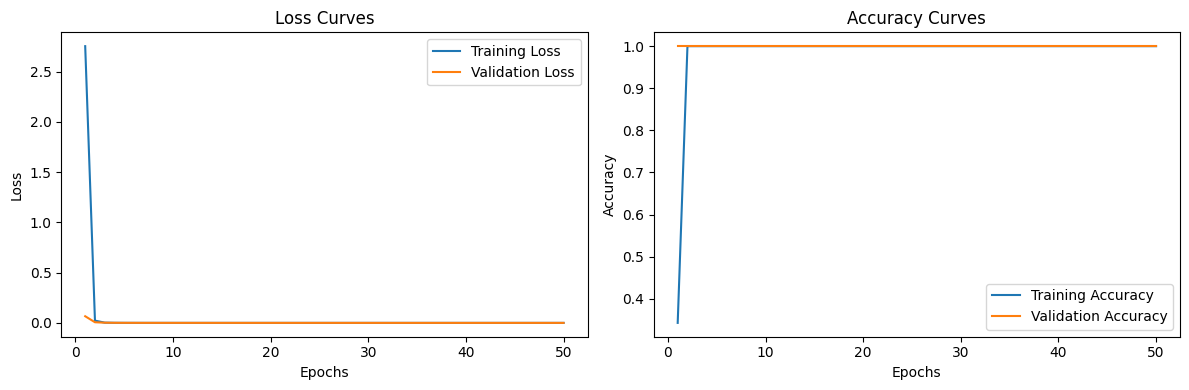

In [ ]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot the decisions
decision_counts = {'Yes': 0, 'No': 0}
for decision in decisions:
    decision_counts[decision] += 1

decision_labels = list(decision_counts.keys())
decision_values = list(decision_counts.values())

plt.bar(decision_labels, decision_values)
plt.xlabel('Decision')
plt.ylabel('Count')
plt.title('Decision Distribution')
plt.show()

NameError: ignored